In [2]:
import numpy as np
import pandas as pd

In [3]:
players=pd.read_csv(r'C:\Users\princ\Desktop\School PDFs\Практика\music_recommend\players\players_22.csv')

C:\Users\princ\AppData\Local\Temp\ipykernel_872\3970933180.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv(r'C:\Users\princ\Desktop\School PDFs\Практика\music_recommend\players\players_22.csv')


In [4]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features=['overall', 'potential', 'value_eur', 'wage_eur', 'age']

In [6]:
players=players.dropna(subset=features)

In [9]:
data=players[features].copy()

In [10]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


## High level
1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [12]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.146473,1.243826,4.403716
std,1.496262,1.323418,0.392477,0.557253,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.024022,1.014306,2.851852
50%,5.130435,5.782609,1.049796,1.071531,4.333333
75%,6.000000,6.652174,1.102634,1.214592,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [19]:
centroids=random_centroids(data,5)

In [20]:
centroids

,0,1,2,3,4
overall,3.826087,6.869565,6.000000,5.130435,4.478261
potential,6.434783,6.000000,5.565217,7.304348,8.826087
value_eur,1.123253,1.049796,1.056240,1.038198,1.061395
wage_eur,1.000000,1.014306,1.000000,1.000000,1.271817
age,2.851852,8.407407,4.333333,3.222222,2.851852


In [22]:
labels = get_labels(data, centroids)

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [11]:
#Stage 1- Scaling the data
data=((data-data.min())/(data.max()-data.min()))*10 +1

In [18]:
#Stage 2 - generating random centroid to initialize with 
def random_centroids(data, k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [21]:
#Stage 3- get label for each data point
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [23]:
#Stage 4- create new centroids 
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

## Visualization of the process

In [25]:
#plot the iteration
def plot_clusters(data, labels, centroids, iteration):
    #converting the data from n columns to 2 columns (x and y)
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    #clear out the former graph so a new one can be shown
    clear_output(wait=True)
    #plot the graph
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

## Implementation of K-means Cluster

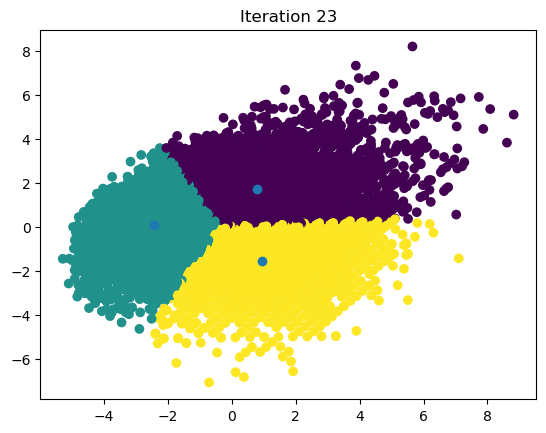

In [26]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1